In [ ]:
import numpy as np
import pandas as pd
import matplotlib

In [ ]:
df = pd.read_csv("/content/2018_22.csv")
df=df[df['volume_traded']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.head()

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2018-01-01T00:00:00.0000000Z,2018-01-01T06:00:00.0000000Z,2018-01-01T00:00:07.0180000Z,2018-01-01T05:59:57.4380000Z,13715.65,13715.65,13155.38,13558.99,2421.241182,29087
1,2018-01-01T06:00:00.0000000Z,2018-01-01T12:00:00.0000000Z,2018-01-01T06:00:03.1190000Z,2018-01-01T11:59:59.4880000Z,13539.00,13818.55,13001.13,13220.56,1876.934392,25612
2,2018-01-01T12:00:00.0000000Z,2018-01-01T18:00:00.0000000Z,2018-01-01T12:00:02.2000000Z,2018-01-01T17:59:59.9940000Z,13220.56,13330.00,12750.00,13022.00,2427.898747,28339
3,2018-01-01T18:00:00.0000000Z,2018-01-02T00:00:00.0000000Z,2018-01-01T18:00:01.8510000Z,2018-01-01T23:59:59.8400000Z,13007.87,13599.70,12940.00,13380.00,1883.841523,22557
4,2018-01-02T00:00:00.0000000Z,2018-01-02T06:00:00.0000000Z,2018-01-02T00:00:00.6990000Z,2018-01-02T05:59:57.2120000Z,13382.16,13850.00,12890.02,13166.95,3957.954564,42047


In [ ]:
df.tail()

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
5905,2022-01-30T18:00:00.0000000Z,2022-01-31T00:00:00.0000000Z,2022-01-30T18:00:00.0000000Z,2022-01-30T23:59:59.9990000Z,37991.00,38230.00,37351.63,37881.76,6585.61002,202058
5906,2022-01-31T00:00:00.0000000Z,2022-01-31T06:00:00.0000000Z,2022-01-31T00:00:00.0000000Z,2022-01-31T05:59:59.9990000Z,37881.75,37951.07,36632.61,37001.65,8621.57839,228004
5907,2022-01-31T06:00:00.0000000Z,2022-01-31T12:00:00.0000000Z,2022-01-31T06:00:00.0000000Z,2022-01-31T11:59:59.9990000Z,37001.66,37399.93,36880.00,37265.16,5679.44334,164498
5908,2022-01-31T12:00:00.0000000Z,2022-01-31T18:00:00.0000000Z,2022-01-31T12:00:00.0000000Z,2022-01-31T17:59:59.9990000Z,37265.15,38600.00,36724.00,38473.03,15217.36560,348336
5909,2022-01-31T18:00:00.0000000Z,2022-02-01T00:00:00.0000000Z,2022-01-31T18:00:00.0000000Z,2022-01-31T23:59:59.9990000Z,38473.03,38744.00,38236.69,38466.90,7330.45148,194889


In [ ]:
time_columns = ['time_period_start', 'time_period_end']
df[time_columns] = df[time_columns].apply(pd.to_datetime)
df.head()

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2018-01-01 00:00:00+00:00,2018-01-01 06:00:00+00:00,2018-01-01T00:00:07.0180000Z,2018-01-01T05:59:57.4380000Z,13715.65,13715.65,13155.38,13558.99,2421.241182,29087
1,2018-01-01 06:00:00+00:00,2018-01-01 12:00:00+00:00,2018-01-01T06:00:03.1190000Z,2018-01-01T11:59:59.4880000Z,13539.00,13818.55,13001.13,13220.56,1876.934392,25612
2,2018-01-01 12:00:00+00:00,2018-01-01 18:00:00+00:00,2018-01-01T12:00:02.2000000Z,2018-01-01T17:59:59.9940000Z,13220.56,13330.00,12750.00,13022.00,2427.898747,28339
3,2018-01-01 18:00:00+00:00,2018-01-02 00:00:00+00:00,2018-01-01T18:00:01.8510000Z,2018-01-01T23:59:59.8400000Z,13007.87,13599.70,12940.00,13380.00,1883.841523,22557
4,2018-01-02 00:00:00+00:00,2018-01-02 06:00:00+00:00,2018-01-02T00:00:00.6990000Z,2018-01-02T05:59:57.2120000Z,13382.16,13850.00,12890.02,13166.95,3957.954564,42047


In [ ]:
def support(df1, l, n1, n2):  #n1 and n2 after candle l
    for i in range(l-n1+1, l+1):
        if(df1.price_low[i]>df1.price_low[i-1]):
            return 0
    for j in range(l+1,l+n2+1):
        if(df1.price_low[j]<df1.price_low[j-1]):
            return 0
    return 1

In [ ]:
def resistance(df1, l, n1, n2): #n1 and n2 after candle l
    for i in range(l-n1+1, l+1):
        if(df1.price_high[i]<df1.price_high[i-1]):
            return 0
    for j in range(l+1,l+n2+1):
        if(df1.price_high[j]>df1.price_high[j-1]):
            return 0
    return 1

In [ ]:
length = len(df)
high = list(df['price_high'])
low = list(df['price_low'])
close = list(df['price_close'])
open = list(df['price_open'])


In [ ]:
df.price_open[1]


13539.0

patterns- bullish engulfing
        - shooting star

In [ ]:
#empty variables needed for parameterization
bodydiff = [0] * length

highdiff = [0] * length
lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

In [ ]:
#bullish engulfing

def Engulfing(l):
    row=l
    bodydiff[row] = abs(df.price_open[row]-df.price_close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001

    bodydiffmin = 0.002
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        df.price_open[row-1]<df.price_close[row-1] and
        df.price_open[row]>df.price_close[row] and
        (df.price_open[row]-df.price_close[row-1])>=-0e-5 and df.price_close[row]<df.price_open[row-1]):
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        df.price_open[row-1]>df.price_close[row-1] and
        df.price_open[row]<df.price_close[row] and
        (df.price_open[row]-df.price_close[row-1])<=+0e-5 and df.price_close[row]>df.price_open[row-1]):
        return 2
    else:
        return 0
        #1- bearish
        #2- bullish

In [ ]:
#Shooting Star Pattern
def Star(l):
    bodydiffmin = 0.0020
    row=l
    highdiff[row] = df.price_high[row]-max(df.price_open[row],df.price_close[row])
    lowdiff[row] = min(df.price_open[row],df.price_close[row])-df.price_low[row]
    bodydiff[row] = abs(df.price_open[row]-df.price_close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001
    ratio1[row] = highdiff[row]/bodydiff[row]
    ratio2[row] = lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and lowdiff[row]<0.2*highdiff[row] and bodydiff[row]>bodydiffmin):
        return 1
    elif (ratio2[row]>1 and highdiff[row]<0.2*lowdiff[row] and bodydiff[row]>bodydiffmin):
        return 2
    else:
        return 0

In [ ]:
def closeResistance(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.price_high[l]-min(levels, key=lambda x:abs(x-df.price_high[l])))<=lim
    c2 = abs(max(df.price_open[l],df.price_close[l])-min(levels, key=lambda x:abs(x-df.price_high[l])))<=lim
    c3 = min(df.price_open[l],df.price_close[l])<min(levels, key=lambda x:abs(x-df.price_high[l]))
    c4 = df.price_low[l]<min(levels, key=lambda x:abs(x-df.price_high[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

In [ ]:
def closeSupport(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.price_low[l]-min(levels, key=lambda x:abs(x-df.price_low[l])))<=lim
    c2 = abs(min(df.price_open[l],df.price_close[l])-min(levels, key=lambda x:abs(x-df.price_low[l])))<=lim
    c3 = max(df.price_open[l],df.price_close[l])>min(levels, key=lambda x:abs(x-df.price_low[l]))
    c4 = df.price_high[l]>min(levels, key=lambda x:abs(x-df.price_low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

signal processing

In [ ]:
n1=2
n2=2
backCandles=30
signal = [0] * length

for row in range(backCandles, len(df)-n2):
    ss = []
    rr = []
    for subrow in range(row-backCandles+n1, row+1):
        if support(df, subrow, n1, n2):
            ss.append(df.price_low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.price_high[subrow])

    if ((Engulfing(row)==1 or Star(row)==1) and closeResistance(row, rr, 150e-5) ):
        signal[row] = 1
    elif((Engulfing(row)==2 or Star(row)==2) and closeSupport(row, ss, 150e-5)):
        signal[row] = 2
    else:
        signal[row] = 0

In [ ]:
df['signal']=signal

In [ ]:
df[df['signal']==2].count()

time_period_start    87
time_period_end      87
time_open            87
time_close           87
price_open           87
price_high           87
price_low            87
price_close          87
volume_traded        87
trades_count         87
signal               87
dtype: int64

In [ ]:
def SIGNAL():
    return df.signal

In [ ]:
df.columns = ['Start Time','End Time','Open time','Close time','Open','High','Low','Close','Volume','Trade','signal']

In [ ]:
data[data['Signal']==2].count

<bound method DataFrame.count of           Open      High       Low     Close        Volume  Signal
30    15414.00  15499.00  12812.00  14699.95  11639.882730       2
83    11311.45  11548.99  10965.00  11530.00   7749.853063       2
215    9633.00   9737.00   9352.00   9694.51   8561.563406       2
272    8770.22   8841.00   8450.00   8833.03  10503.790930       2
289    7760.00   8299.00   7650.00   8235.00  14991.025360       2
...        ...       ...       ...       ...           ...     ...
5502  62193.15  63351.02  62000.00  63013.04  11053.783760       2
5526  58413.44  59220.31  58075.62  59057.89   9661.625050       2
5607  59594.04  60840.23  58373.00  60762.83  14930.436550       2
5702  47140.54  48683.70  46751.00  48322.46   9054.961670       2
5713  47513.16  47684.55  45672.75  46702.75  18541.121700       2

[87 rows x 6 columns]>

In [ ]:
data

,Open,High,Low,Close,Volume,Signal
0,13715.65,13715.65,13155.38,13558.99,2421.241182,0
1,13539.00,13818.55,13001.13,13220.56,1876.934392,0
2,13220.56,13330.00,12750.00,13022.00,2427.898747,0
3,13007.87,13599.70,12940.00,13380.00,1883.841523,0
4,13382.16,13850.00,12890.02,13166.95,3957.954564,0
...,...,...,...,...,...,...
5905,37991.00,38230.00,37351.63,37881.76,6585.610020,0
5906,37881.75,37951.07,36632.61,37001.65,8621.578390,0
5907,37001.66,37399.93,36880.00,37265.16,5679.443340,0
5908,37265.15,38600.00,36724.00,38473.03,15217.365600,0


Backtesting

In [ ]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=99f3ac2995aa35dbe43ffad60c2c9e8e45dc7ef7305afeab05ca9cf9760a36b2
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [ ]:
data = pd.DataFrame({
    'Open': df['Open'],
    'High': df['High'],
    'Low': df['Low'],
    'Close': df['Close'],
    'Volume': df['Volume'],
    'Signal': df['signal']
})

In [ ]:
from backtesting import  Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

bt = Backtest(data, SmaCross, commission=.002, exclusive_orders=True)
stats = bt.run()

bt.plot()

print(stats)

Start                                     0.0
End                                    5909.0
Duration                               5909.0
Exposure Time [%]                    63.58714
Equity Final [$]                  17862.02716
Equity Peak [$]                    21399.2061
Return [%]                          78.620272
Buy & Hold Return [%]              183.700335
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -50.547156
Avg. Drawdown [%]                   -9.096363
Max. Drawdown Duration                 1959.0
Avg. Drawdown Duration              212.62963
# Trades                                195.0
Win Rate [%]                        35.897436
Best Trade [%]                       50.55902
Worst Trade [%]                    -23.755136
Avg. Trade [%]                    

In [ ]:
import warnings
warnings. simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
def GoldenCrossverSignal(name):
    path = f'../Data/{name}.csv'
    data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
    data['Prev_Close'] = data.Close.shift(1)
    data['20_SMA'] = data.Prev_Close.rolling(window=20, min_periods=1).mean()
    data['50_SMA'] = data.Prev_Close.rolling(window=50, min_periods=1).mean()
    data['Signal'] = 0
    data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)
    data['Position'] = data.Signal.diff()
    df_pos = data[(data['Position'] == 1) | (data['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    return df_pos

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np

class GoldenCrossverBacktest:
    def __init__(self, equity_name, capital):
        self.equity_name = equity_name
        self.capital = capital
        self.columns = ['Equity Name', 'Trade', 'Entry Time', 'Entry Price', 'Exit Time', 'Exit Price', 'Quantity', 'Position Size', 'PNL', '% PNL', 'Holding Period']
        self.backtesting = pd.DataFrame(columns=self.columns)
        self.equity_curve = pd.DataFrame(columns=['Date', 'Equity'])
        self.equity = 0
        self.total_investment = 0

    def buy(self, entry_time, entry_price, qty):
        trade_log = dict(zip(self.columns, [None] * len(self.columns)))
        trade_log['Trade'] = 'Long Open'
        trade_log['Quantity'] = qty
        trade_log['Position Size'] = round(trade_log['Quantity'] * entry_price, 3)
        trade_log['Equity Name'] = self.equity_name
        trade_log['Entry Time'] = entry_time
        trade_log['Entry Price'] = round(entry_price, 2)
        self.total_investment += trade_log['Position Size']
        if isinstance(trade_log, int):
          self.equity += trade_log['PNL']
          self.equity_curve = self.equity_curve.append({'Date': entry_time, 'Equity': self.equity}, ignore_index=True)

        return trade_log

    def sell(self, exit_time, exit_price, exit_type, charge, trade_log):
        trade_log['Trade'] = 'Long Closed'
        trade_log['Exit Time'] = exit_time
        trade_log['Exit Price'] = round(exit_price, 2)
        trade_log['Exit Type'] = exit_type
        trade_log['PNL'] = round((trade_log['Exit Price'] - trade_log['Entry Price']) * trade_log['Quantity'] - charge, 3)
        trade_log['% PNL'] = round((trade_log['PNL'] / trade_log['Position Size']) * 100, 3)
        trade_log['Holding Period'] = (exit_time - trade_log['Entry Time'])

        if isinstance(trade_log, int):
          self.equity += trade_log['PNL']
          self.equity_curve = self.equity_curve.append({'Date': exit_time, 'Equity': self.equity}, ignore_index=True)

        return trade_log

    def stats(self):
        df = self.backtesting
        parameters = ['Total Trade Scripts', 'Total Trade', 'PNL',  'Winners', 'Losers', 'Win Ratio','Total Profit', 'Total Loss', 'Average Loss per Trade', 'Average Profit per Trade', 'Average PNL Per Trade', 'Risk Reward','max_drawdown_percent', 'average_drawdown_percent', 'sharpe_ratio', 'max_duration_time','roi']
        total_traded_scripts = len(df['Equity Name'].unique())
        total_trade = len(df.index)
        pnl = df.PNL.sum()
        winners = len(df[df.PNL > 0])
        loosers = len(df[df.PNL <= 0])
        win_ratio = str(round((winners/total_trade) * 100, 2)) + '%'
        total_profit = round(df[df.PNL > 0].PNL.sum(), 2)
        total_loss  = round(df[df.PNL <= 0].PNL.sum(), 2)
        average_loss_per_trade = round(total_loss/loosers, 2)
        average_profit_per_trade = round(total_profit/winners, 2)
        average_pnl_per_trade = round(pnl/total_trade, 2)
        risk_reward = f'1:{-1 * round(average_profit_per_trade/average_loss_per_trade, 2)}'
        # data_points = [total_traded_scripts,total_trade,pnl,winners, loosers, win_ratio, total_profit, total_loss, average_loss_per_trade, average_profit_per_trade, average_pnl_per_trade, risk_reward]
        # data = list(zip(parameters,data_points ))

        # Drawdown metrics
        cumulative_pnl = df['PNL'].cumsum()
        cumulative_max_pnl = cumulative_pnl.expanding().max()

        drawdown = (cumulative_pnl - cumulative_max_pnl) / (100*cumulative_max_pnl)
        # drawdown[drawdown < 0] = 0  # Set negative drawdowns to zero
        print(drawdown)
        max_drawdown_percent = round(drawdown.min() *100, 4)
        average_drawdown_percent = round(drawdown.mean() *100 , 4)

        daily_returns = df['PNL'].pct_change().fillna(0)
        daily_std = daily_returns.std()

        if daily_std != 0:  # Check if the standard deviation is not zero
            sharpe_ratio = round((daily_returns.mean() / daily_std) * np.sqrt(252), 4)
        else:
            sharpe_ratio = 0  # Handle the case when the standard deviation is zero

        # Net Profit Exceeding Benchmark
        # benchmark_returns = benchmark_returns[benchmark_returns.index.isin(df['Entry Time'].dt.date.unique())]
        # net_profit_exceeding_benchmark = round(pnl - benchmark_returns.sum(), 2)

        # Max Duration Time
        max_duration_time = df['Holding Period'].max()
        roi = ((total_profit+total_loss)/capital)*100

        data_points = [total_traded_scripts, total_trade, pnl, winners, loosers, win_ratio, total_profit, total_loss, average_loss_per_trade, average_profit_per_trade, average_pnl_per_trade, risk_reward, max_drawdown_percent, average_drawdown_percent, sharpe_ratio, max_duration_time,roi]
        d = list(zip(parameters, data_points))
        print(d)
        print(tabulate(d, ['Parameters', 'Values'], tablefmt='psql'))

    def plot_equity_curve(self):
        if not self.equity_curve.empty:
            plt.figure(figsize=(12, 6))
            plt.plot(self.equity_curve['Date'], self.equity_curve['Equity'], label='Equity Curve', color='blue')
            plt.xlabel('Date')
            plt.ylabel('Equity')
            plt.title('Equity Curve')
            plt.legend()
            plt.show()

    def save_equity_curve(self, filename='equity_curve.png'):
        if not self.equity_curve.empty:
            plt.figure(figsize=(12, 6))
            plt.plot(self.equity_curve['Date'], self.equity_curve['Equity'], label='Equity Curve', color='blue')
            plt.xlabel('Date')
            plt.ylabel('Equity')
            plt.title('Equity Curve')
            plt.legend()
            plt.savefig(filename)


equity_name = 'BTCUSDT'
capital = 50000

bt = GoldenCrossverBacktest(equity_name, capital)

for index, row in data.iterrows():
    if row['Signal'] == 2:  # Assuming 'Signal' column indicates a buy signal
        qty = bt.capital // row['Open']
        trade_log = bt.buy(index, row['Open'], qty)
    elif row['Signal'] == 1:  # Assuming 'Signal' column indicates a sell signal
        trade_log = bt.sell(index, row['Open'], 'Exit Trigger', 0, trade_log)
        bt.backtesting = bt.backtesting.append(trade_log, ignore_index=True)

# Display the backtesting results
print(bt.backtesting)


   Equity Name        Trade Entry Time  Entry Price Exit Time  Exit Price  \
0      BTCUSDT  Long Closed         83     11311.45        85    11470.00   
1      BTCUSDT  Long Closed         83     11311.45       100    11184.70   
2      BTCUSDT  Long Closed         83     11311.45       157     8842.98   
3      BTCUSDT  Long Closed         83     11311.45       199    11693.14   
4      BTCUSDT  Long Closed         83     11311.45       205    10759.00   
..         ...          ...        ...          ...       ...         ...   
63     BTCUSDT  Long Closed       5607     59594.04      5664    57160.66   
64     BTCUSDT  Long Closed       5607     59594.04      5672    56959.77   
65     BTCUSDT  Long Closed       5713     47513.16      5796    47378.00   
66     BTCUSDT  Long Closed       5713     47513.16      5800    46733.78   
67     BTCUSDT  Long Closed       5713     47513.16      5821    42094.48   

    Quantity  Position Size      PNL   % PNL Holding Period     Exit Type  

In [ ]:
bt.stats()

0     0.000000
1    -0.007994
2    -0.163685
3    -0.139611
4    -0.174455
        ...   
63    0.000000
64    0.000000
65   -0.000008
66   -0.000051
67   -0.000353
Name: PNL, Length: 68, dtype: float64
[('Total Trade Scripts', 1), ('Total Trade', 68), ('PNL', 173001.37999999998), ('Winners', 40), ('Losers', 28), ('Win Ratio', '58.82%'), ('Total Profit', 255239.18), ('Total Loss', -82237.8), ('Average Loss per Trade', -2937.06), ('Average Profit per Trade', 6380.98), ('Average PNL Per Trade', 2544.14), ('Risk Reward', '1:2.17'), ('max_drawdown_percent', -17.4455), ('average_drawdown_percent', -1.3467), ('sharpe_ratio', nan), ('max_duration_time', 298), ('roi', 346.00276)]
+--------------------------+--------------------+
| Parameters               | Values             |
|--------------------------+--------------------|
| Total Trade Scripts      | 1                  |
| Total Trade              | 68                 |
| PNL                      | 173001.37999999998 |
| Winners          

In [ ]:
from tabulate import tabulate

In [ ]:
bt.plot_equity_curve()

risk management and trending

In [ ]:
#Flexible target
#trend catcher
pipdiff=250*1e-4
SLTPRatio=1  #stop loss ratio
def target(bars,df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trend=[0]*length  #variable to catch the uptrend or downtrend
    for line in range (0,length-bars-2):
      valueOpenLow = 0
      valueOpenHigh = 0
      for i in range(1,bars+2):
          value1 = open[line+1]-low[line+i]
          value2 = open[line+1]-high[line+i]
          valueOpenLow = max(value1, valueOpenLow)
          valueOpenHigh = min(value2, valueOpenHigh)
          if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trend[line] = 1 #downtrend
                break
          elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trend[line] = 2 #uptrend
                break
          else:
                trend[line] = 0 #no clear trend

    return trend

<Axes: >

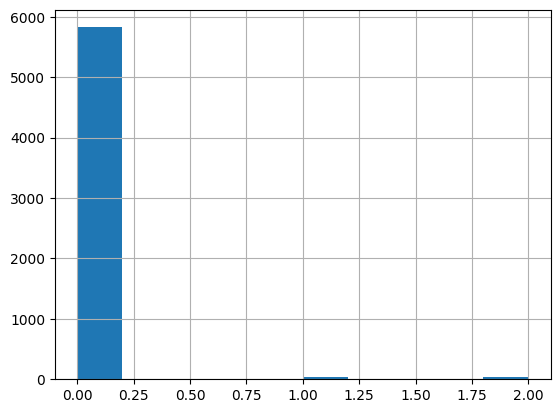

In [ ]:
df['Target']=target(30,df)
df['Target']=df['Target'].astype(int)
df['Target'].hist()

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=1b3b378b0211e378d9eb8875521f28b79b572a48f57f44bf8e71f738bf75bb7c
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas_ta as pa
df["RSI"] = pa.rsi(df.Close, length=16)
df.tail(20)

,Start Time,End Time,Open,High,Low,Close,Volume,Trade,signal,Target,RSI
5890,2022-01-27 00:00:00+00:00,2022-01-27 06:00:00+00:00,36807.24,37080.00,35507.01,35973.39,15885.31129,337858,0,0,41.879577
5891,2022-01-27 06:00:00+00:00,2022-01-27 12:00:00+00:00,35977.88,36781.79,35815.80,36679.98,11232.28306,286131,0,0,45.571284
5892,2022-01-27 12:00:00+00:00,2022-01-27 18:00:00+00:00,36679.98,37199.00,36161.41,36282.03,12002.57280,334669,0,0,43.896280
5893,2022-01-27 18:00:00+00:00,2022-01-28 00:00:00+00:00,36282.02,37234.47,35538.75,37160.10,13900.71219,349750,0,0,48.363249
5894,2022-01-28 00:00:00+00:00,2022-01-28 06:00:00+00:00,37160.11,37467.98,36500.00,37205.60,10937.12177,251983,0,0,48.589496
5895,2022-01-28 06:00:00+00:00,2022-01-28 12:00:00+00:00,37206.17,37500.00,36287.03,36448.28,10383.91790,266533,0,0,45.082540
5896,2022-01-28 12:00:00+00:00,2022-01-28 18:00:00+00:00,36447.67,37376.70,36155.01,36843.60,12814.03251,319734,0,0,47.204245
5897,2022-01-28 18:00:00+00:00,2022-01-29 00:00:00+00:00,36843.59,38000.00,36765.05,37716.56,8019.19738,222851,0,0,51.607994
5898,2022-01-29 00:00:00+00:00,2022-01-29 06:00:00+00:00,37716.57,37983.41,37448.58,37653.72,5508.01056,167102,0,0,51.279567
5899,2022-01-29 06:00:00+00:00,2022-01-29 12:00:00+00:00,37653.71,37925.00,37544.94,37736.07,4800.30777,161502,0,0,51.709145


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.describe())

               Open          High           Low         Close         Volume  \
count   5894.000000   5894.000000   5894.000000   5894.000000    5894.000000   
mean   18587.879187  18855.994620  18290.126949  18591.243955   14246.047060   
std    17744.946056  18003.233676  17455.340714  17745.182577   12920.750918   
min     3185.940000   3213.000000   3156.260000   3185.940000     750.084552   
25%     7100.175000   7186.870000   7009.307500   7100.065000    7262.094756   
50%     9503.515000   9594.340000   9364.550000   9503.535000   10954.430670   
75%    32171.830000  32768.415000  31419.900000  32178.907500   16872.757158   
max    68635.120000  69000.000000  67300.000000  68633.690000  324639.315500   

              Trade       signal       Target          RSI  
count  5.894000e+03  5894.000000  5894.000000  5894.000000  
mean   2.187568e+05     0.041059     0.021547    51.341009  
std    2.576970e+05     0.262500     0.188892    12.837475  
min    5.307000e+03     0.000000   

In [ ]:
features=['RSI','signal','Target']
df_model=df[features].copy()
df_model['signal'] = pd.Categorical(df_model['signal'])
dfDummies = pd.get_dummies(df_model['signal'], prefix = 'category')
df_model= df_model.drop(['signal'], axis=1)
df_model = pd.concat([df_model, dfDummies], axis=1)

In [ ]:
df_model

,RSI,Target,category_0,category_1,category_2
0,67.754228,0,1,0,0
1,77.698227,0,1,0,0
2,80.917156,0,1,0,0
3,82.419238,0,1,0,0
4,75.899606,0,1,0,0
...,...,...,...,...,...
5889,52.010596,0,1,0,0
5890,45.919568,0,1,0,0
5891,47.869327,0,1,0,0
5892,55.681589,0,1,0,0


Model run

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

In [ ]:
features1=['RSI','category_0','category_1','category_2']
X_data=df_model[features1]
Y_data=df_model['Target']

train_pct_index = int(0.7 * len(X_data))
X_train, X_test = X_data[:train_pct_index], X_data[train_pct_index:]
y_train, y_test = Y_data[:train_pct_index], Y_data[train_pct_index:]


model=XGBClassifier()
model.fit(X_train,y_train)
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)

acc_train=accuracy_score(y_train,pred_train)
acc_test=accuracy_score(y_test,pred_test)

print("Train Accuracy: {:.4%}".format(acc_train))
print("Test Accuracy: {:.4%}".format(acc_test))


Train Accuracy: 98.5697%
Test Accuracy: 98.6998%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
matrix_train=(y_train,pred_train)
matrix_test=(y_test,pred_test)

report_train = classification_report(y_train, pred_train)
report_test = classification_report(y_test, pred_test)

print(report_train)
print(report_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4064
           1       0.00      0.00      0.00        34
           2       1.00      0.07      0.14        27

    accuracy                           0.99      4125
   macro avg       0.66      0.36      0.38      4125
weighted avg       0.98      0.99      0.98      4125

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1746
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        16

    accuracy                           0.99      1769
   macro avg       0.33      0.33      0.33      1769
weighted avg       0.97      0.99      0.98      1769



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
features2=['RSI','category_0','category_1','category_2']
X_data1=df_model[features1]
Y_data1=df_model['Target']

train_pct_index = int(0.7 * len(X_data1))
X_train1, X_test1 = X_data1[:train_pct_index], X_data1[train_pct_index:]
y_train1, y_test1 = Y_data1[:train_pct_index], Y_data1[train_pct_index:]

model2=MLPClassifier(hidden_layer_sizes=(50,50,60,30,10),random_state=42,verbose=0,max_iter=1000,activation='relu')
model2.fit(X_train1,y_train1)

pred_train1=model2.predict(X_train1)
pred_test1=model2.predict(X_test1)

acc_train1=accuracy_score(y_train1,pred_train1)
acc_test1=accuracy_score(y_test1,pred_test1)

print("Train Accuracy: {:.4%}".format(acc_train1))
print("Test Accuracy: {:.4%}".format(acc_test1))

Train Accuracy: 98.5212%
Test Accuracy: 98.6998%


OUT OF SAMPLE -2022 data

In [ ]:
df4 = pd.read_csv("/content/2022.csv")
df4=df4[df4['volume_traded']!=0]
df4.reset_index(drop=True, inplace=True)
df4.isna().sum()
df4.head()

In [ ]:
time_columns2 = ['time_period_start', 'time_period_end']
df4[time_columns2] = df4[time_columns2].apply(pd.to_datetime)
df4.head()

In [ ]:
features2=['RSI','signal','Target']
df_model2=df[features2].copy()
df_model2['signal'] = pd.Categorical(df_model2['signal'])
dfDummies = pd.get_dummies(df_model2['signal'], prefix = 'category')
df_model2= df_model2.drop(['signal'], axis=1)
df_model2 = pd.concat([df_model2, dfDummies], axis=1)